# 【問題1】SVM分類器のクラスを作成する
###### SVM分類器のクラスを作成し、Sprint0で作成した分類のパイプラインに組み込んでください。
##### クラスの基本構造はSprint3の線形回帰を参考にし、名前はScratchSVMClassifierとしてください。
##### メソッドやパラメータなどはscikit-learnを参考にしてください。
##### sklearn.svm.SVC — scikit-learn 0.20.2 documentation
##### 検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

In [6]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from numpy.random import *

In [148]:
class ScratchSVMRegression():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """
    
    

    def __init__(self, num_iter=500, lr=0.001, threshold = 0.001, bias=True, verbose=True): 
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        #self.ramda = []
        self.verbose = verbose
        self.threshold = threshold # 閾値の設定
        
        
        # サポートベクターのリストを格納
        self.support_vectors_index = []
        self.support_vectors_X = []
        self.support_vectors_y = []
        self.support_vectors_ramda = []
        
        # 損失を記録する配列を用意
        self.loss = []
        self.val_loss = []
        

    def kearnel_(self,X_i,X_j): #カーネル関数をセットしておく
        """""
        X_iの配列の形は (n_samples,m_features)
        X_jの配列の形は (l_samples,m_features)
        返り値の配列の形は (l_samples, n_samples)
        
        X_iを転置して後ろから掛け合わせる
        
        """""
        return X_j @ X_i.T
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        #変数の調整
        #サンプル数分のラムダを用意する。
        self.ramda = rand(X.shape[0]).reshape(-1,1) # (n_samples,1)
        cal = 0
        cal_val = 0
        self.X_val = X_val
        self.y_val = y_val
        
        #バイアスの調整
        #bias を含める場合、全てのサンプルにx0=1を追加
        if self.bias == True:
            X = np.hstack([np.c_[np.ones(X.shape[0])],np.c_[X]])
            if (X_val is not None) and (y_val is not None): #　検証データがある場合もバイアス項を含めるため、全てのサンプルにx0=1を追加
                X_val = np.hstack([np.c_[np.ones(X_val.shape[0])],np.c_[X_val]]) 
    
        
        #最急勾配降下法を実施
        for iter_ in range(0,self.iter):
            #ラムダの更新            
            self.ramda = self.ramda + self.lr * (1 -(self.ramda * (y @ y.T * self.kearnel_(X,X)).sum(axis=0).reshape(-1,1)))#ラムダの更新
            self.ramda = np.where(self.ramda < 0, 0, self.ramda) #もしラムダの値が０未満になったら、０にする。  
            #print(self.ramda[45])
            """    
            for j in range(0,X.shape[0]):
                for i in range(0,X.shape[1]):                               
                    cal += self.ramda[i] * self.ramda[j] * y[i] * y[j] * np.dot(X.reshape(-1,1),X.reshape(1,-1))[i,j]
            self.loss.append(sum(self.ramda) - 0.5 * cal) #学習データの目的関数スコア推移
            if (X_val is not None) and (y_val is not None):
                while i <= X_val.shape[0]: #　検証データがある場合もバイアス項を含めるため、全てのサンプルにx0=1を追加
                    cal_val += self.ramda[i] * self.ramda[j] * y_val[i] * y_val[j] * X_val[i] * X_val[j]
                    self.val_loss.append(sum(self.ramda) - 0.5 * cal_val) #検証データの目的関数スコア推移
            """
                                                 
            #print('self.ramda.T',self.ramda.T)
            #print('y.T',y.T)
            #print('self.kearnel_(X,X)',self.kearnel_(X,X))
            
            loss = (self.ramda@self.ramda.T) * (y@y.T) * self.kearnel_(X,X)
            self.loss.append(loss) #学習データの目的関数スコア推移
                             
            if (X_val is not None) and (y_val is not None):
                             val_loss = (self.ramda @ self.ramda.reshape(-1,1)) * (y_val @ y_val.reshape(-1,1)) * self.kearnel(X_val,X_val)
                             self.val_loss.append(val_loss)
                             
        

        print(self.ramda)
        
        
        #サポートベクター番号の決定
        for i in range(0,len(self.ramda)):
            if self.ramda[i] > self.threshold:
                self.support_vectors_index.append(i)
        print(self.threshold)
        print(self.support_vectors_index)
            
        
        #サポートベクトルのラムダとyを設定する。
        for i in range(0,len(self.support_vectors_index)):
            self.support_vectors_X.append(X[self.support_vectors_index[i]])
            self.support_vectors_y.append(y[self.support_vectors_index[i]])
            self.support_vectors_ramda.append(self.ramda[self.support_vectors_index[i]])
            
        # １列、サンプル数列のnumpy配列形に調整
        self.support_vectors_X_array = np.array(self.support_vectors_X).reshape(-1,X.shape[1])
        self.support_vectors_y_array = np.array(self.support_vectors_y).reshape(-1,1)
        self.support_vectors_ramda_array = np.array(self.support_vectors_ramda).reshape(-1,1)
  
        
        
        #print('サポートベクターズ:',self.support_vectors_index)
        #print('サポートベクターズ X:',self.support_vectors_X)
        
        
        #ラベルの推定
        #print(X)
        #print(X.shape)
        #print(np.array(self.support_vectors))
        #print(np.array(self.support_vectors).shape)
        #self.ramda[i] * y[i] *  self.kearnel_(X,np.array(self.support_vectors))



    def predict_boundary(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        #　bias を含める場合、全てのサンプルにx0=1を追加
        if self.bias == True:
            X = np.hstack([np.c_[np.ones(X.shape[0])],np.c_[X]])  
        
        y_pred = []
        y_pred_lavel = []
        
        #最急勾配効果法を完了した時点でのramdaを使ってｙ_predを予測する
        y_pred = (self.support_vectors_ramda_array  * self.support_vectors_y_array  *  self.kearnel_(X,self.support_vectors_X_array )).sum(axis=0)
        
        
        return np.array(y_pred).reshape(-1,1)     
    
    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        #　bias を含める場合、全てのサンプルにx0=1を追加
        if self.bias == True:
            X = np.hstack([np.c_[np.ones(X.shape[0])],np.c_[X]])  
        
        y_pred = []
        y_pred_lavel = []
        
        #最急勾配効果法を完了した時点でのramdaを使ってｙ_predを予測する
        y_pred = (self.support_vectors_ramda_array  * self.support_vectors_y_array  *  self.kearnel_(X,self.support_vectors_X_array )).sum(axis=0)
        
        #y_predの形を整える
        y_pred = y_pred.reshape(-1,1)
        
        
        #ラベルを貼り付け
        for i in range(0,len(y_pred)):
            if y_pred[i] >= 0:
                y_pred_lavel.append(1)
            else:
                y_pred_lavel.append(-1)
        
        return np.array(y_pred_lavel).reshape(-1,1) 
    
    
    
    def loss_graph(self):
        
        #損失関数の遷移
        plt.figure(figsize=(4, 3), dpi=200)
        plt.title('model loss')
        plt.xlabel('iter')
        plt.ylabel('L(λ)')
        if (self.X_val is not None) and (self.y_val is not None): #　検証データがある場合
            plt.plot(self.val_loss, color='red',label = "val_loss",linewidth=1,linestyle='solid')
        plt.plot(self.loss, color='blue',label = "train_loss",linewidth=1,linestyle='dashed')
        plt.legend()

In [149]:
#インスタンスを作成
SVM = ScratchSVMRegression()

シンプルデータセット1を用意

In [150]:
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index].reshape(-1,1)

from sklearn.model_selection import train_test_split
X, X_val, y, y_val = train_test_split(X, y,test_size=0.3)

In [151]:
#学習を開始
SVM.fit(X,y)

[[0.00063271]
 [0.00052932]
 [0.00062761]
 [0.00056201]
 [0.00067773]
 [0.00051961]
 [0.001     ]
 [0.00081218]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.00061408]
 [0.00058081]
 [0.00065352]
 [0.0006897 ]
 [0.00052923]
 [0.00060909]
 [0.00072408]
 [0.001     ]
 [0.0006495 ]
 [0.00065327]
 [0.0006489 ]
 [0.00051517]
 [0.00102636]
 [0.0008082 ]
 [0.00062887]
 [0.0006775 ]
 [0.001     ]
 [0.00058525]
 [0.0008126 ]
 [0.00054984]
 [0.0006298 ]
 [0.00061215]
 [0.00061036]
 [0.00065   ]
 [0.00062655]
 [0.00062078]
 [0.00063904]
 [0.0007648 ]
 [0.0006825 ]
 [0.00078382]
 [0.00077894]
 [0.001     ]
 [0.0005674 ]
 [0.00072476]
 [0.00078929]
 [0.00095476]
 [0.0005523 ]
 [0.00066719]
 [0.00078396]
 [0.0005863 ]
 [0.00098191]
 [0.00051353]
 [0.00068023]
 [0.00074296]
 [0.00090691]
 [0.00098502]
 [0.00069221]
 [0.00061272]
 [0.00069123]
 [0.00069773]
 [0.00060877]
 [0.00093315]
 [0.001     ]
 [0.00123024]
 [0.001     ]
 [0.00073647]
 [0.00064407]
 [0.00066075]
 [0.00094713]
 [0.00076397]
 [0.00

In [156]:
#予測
SVM.predict(X)

array([[ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],

# 【問題3】指標値の算出
###### 分類に関する指標値で精度を確認してください。

In [157]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc
y_pred = SVM.predict(X_val)

print('正解率:', accuracy_score(y_pred,y_val))
print('適合率:', precision_score(y_pred,y_val))
print('再現率:', recall_score(y_pred,y_val))
print('F1スコア:', f1_score(y_pred,y_val))

正解率: 1.0
適合率: 1.0
再現率: 1.0
F1スコア: 1.0


# 【問題4】決定領域の可視化
###### 2値分類のデータセットに対して決定領域を可視化してください。
###### これまで使用してきた関数に、サポートベクターを色を変えて表示する機能を加えてください。
###### 特にSprint0で作成したシンプルデータセット1に対して以下のように分類ができるかを検証してください。

In [154]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples,)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict_boundary(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    #サポートベクターの黄色表示
    if model.bias == True: #バイアス項がある場合
        plt.scatter(model.support_vectors_X_array[:,1], model.support_vectors_X_array[:,2], color='yellow',s=40, marker='o')
    else: #バイアス項がない場合
        plt.scatter(model.support_vectors_X_array[:,0], model.support_vectors_X_array[:,1], color='yellow',s=40, marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

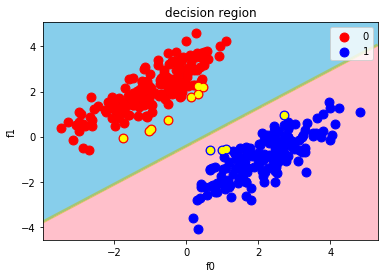

In [155]:
decision_region(X,y.ravel(),SVM,xlabel='f0', ylabel='f1', target_names=['0', '1'])

# 【問題5】時間の計測
###### SVMの学習には時間がかかるため、効率的な実装が望まれます。
###### 事前学習期間に行なったように、時間を計測して改善していきましょう。
###### 特に λの更新部分は繰り返し処理が多いため、効率的なコードを目指してください。

In [122]:
import time
t0 = time.time()
SVM.fit(X,y) #時間を図りたい処理
t1 = time.time()
print('time : {}s'.format(t1-t0))

[[0.001     ]
 [0.0005883 ]
 [0.0005146 ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.00051877]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.00057005]
 [0.00055968]
 [0.001     ]
 [0.00051548]
 [0.00068739]
 [0.001     ]
 [0.00057462]
 [0.001     ]
 [0.00052085]
 [0.001     ]
 [0.00063981]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.00066235]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.00053485]
 [0.00051121]
 [0.001     ]
 [0.00054034]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.00050544]
 [0.001     ]
 [0.00069657]
 [0.001     ]
 [0.00058259]
 [0.001     ]
 [0.00057513]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.00052729]
 [0.00060522]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.001     ]
 [0.00056978]
 [0.00